In [2]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=c52b10775919bbbde4a136f5b836f5999ea98394e8ddd7347e30488f431a9f8e
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=985ebfee361f412ceca2b7fd0be7638c26a718d32abfe2c37a752b073c1eb2d0
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [3]:
import umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
reducer = umap.UMAP()

In [ ]:
deer=pd.read_csv('deers_geom.csv')
deer=deer.fillna(0)


In [ ]:
deer

,filename,Ax,Ay,Bx,By,Cx,Cy,Dx,Dy,Ex,...,Kx,Ky,Nx,Ny,xx,xy,yx,yy,Wx,Wy
0,1,32.0,488.0,892.0,587.0,878.0,928.0,409.0,874.0,316.0,...,90.0,50.0,361.0,416.0,418.0,1021.0,894.0,1134.0,0.0,0.0
1,2,64.0,239.0,1202.0,462.0,1091.0,622.0,613.0,580.0,494.0,...,241.0,55.0,300.0,180.0,501.0,535.0,1108.0,762.0,0.0,0.0
2,3,36.0,396.0,942.0,281.0,910.0,430.0,433.0,444.0,322.0,...,33.0,140.0,299.0,275.0,407.0,627.0,967.0,596.0,0.0,0.0
3,4,280.0,379.0,1386.0,442.0,1239.0,680.0,712.0,614.0,679.0,...,39.0,79.0,607.0,341.0,619.0,767.0,1235.0,825.0,0.0,0.0
4,5,278.0,777.0,1176.0,652.0,1195.0,905.0,612.0,870.0,561.0,...,61.0,99.0,501.0,661.0,547.0,973.0,1195.0,1080.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,825.0,421.0,210.0,179.0,201.0,372.0,589.0,485.0,635.0,...,982.0,211.0,738.0,290.0,588.0,577.0,176.0,420.0,0.0,0.0
152,153,305.0,413.0,918.0,701.0,901.0,756.0,573.0,608.0,553.0,...,249.0,110.0,448.0,439.0,544.0,649.0,868.0,830.0,0.0,0.0
153,154,456.0,365.0,234.0,107.0,171.0,227.0,310.0,335.0,390.0,...,503.0,312.0,405.0,268.0,301.0,356.0,162.0,270.0,0.0,0.0
154,155,198.0,112.0,519.0,284.0,472.0,358.0,313.0,243.0,320.0,...,222.0,23.0,274.0,113.0,288.0,281.0,438.0,407.0,537.0,290.0


In [ ]:
deer.filename.value_counts()

1      1
108    1
101    1
102    1
103    1
      ..
53     1
54     1
55     1
56     1
156    1
Name: filename, Length: 156, dtype: int64

In [ ]:
#sns.pairplot(deer.head(10), hue='filename');

In [ ]:
#НАЧАЛО!

In [ ]:
deer_data = deer[['Ax', 'Ay', 'Bx',
           'By', 'Cx', 'Cy', 'Dx',
           'Dy', 'Ex', 'Ey', 'Fx', 
           'Fy', 'Hx', 'Hy', 'Ix',
           'Iy', 'Lx', 'Ly', 'Kx',
           'Ky', 'Nx', 'Ny', 'xx', 
         'xy', 'yx', 'yy', 'Wx', 'Wy']
].values
#scaled_deer_data = StandardScaler().fit_transform(deer_data)

In [ ]:
scaled_deer_data = StandardScaler().fit_transform(deer_data)

In [ ]:
embedding=reducer.fit_transform(scaled_deer_data)
embedding.shape

(156, 2)

In [ ]:
embedding

array([[ 6.07884645e-01,  4.14507008e+00],
       [ 5.39118290e-01,  4.86592102e+00],
       [ 9.48461533e-01,  5.17933607e+00],
       [ 4.98352259e-01,  4.37142229e+00],
       [ 3.58973145e-01,  3.74055052e+00],
       [ 4.24514115e-01,  3.84602594e+00],
       [ 1.57636344e+00,  6.18257856e+00],
       [ 3.52179360e+00,  1.06728239e+01],
       [ 3.51014543e+00,  9.26715279e+00],
       [ 1.26607955e+00,  6.04780483e+00],
       [ 5.64038515e+00,  1.24998379e+01],
       [ 5.53345633e+00,  1.27783260e+01],
       [ 5.60282803e+00,  1.26459370e+01],
       [ 3.14056695e-01,  3.76758742e+00],
       [-1.31581891e-02,  3.66256905e+00],
       [ 4.60132092e-01,  4.04944754e+00],
       [ 1.53727663e+00,  6.21480370e+00],
       [ 5.77199697e-01,  4.53928232e+00],
       [ 5.16370058e-01,  3.69035935e+00],
       [ 5.29198647e+00,  1.11410723e+01],
       [ 5.39587975e+00,  1.14620771e+01],
       [ 3.68563890e-01,  4.62622356e+00],
       [ 5.52529716e+00,  1.17961626e+01],
       [ 5.

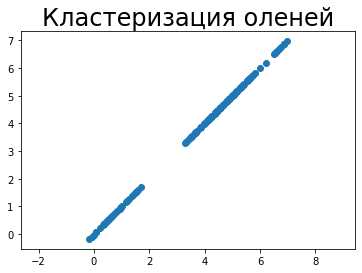

In [ ]:
#что-то...
plt.scatter(
    embedding[:, 0],
    embedding[:, 0])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Кластеризация оленей', fontsize=24);

In [ ]:
#метрика другая должна быть
mapper = umap.UMAP(metric='hellinger', random_state=10)
embedding = mapper.fit_transform(deer)
#display(test_embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], s=1, cmap='Spectral')

ValueError: ignored

In [ ]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 54.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3580408 sha256=55ace931009096e5746f9b52d9004b14284351b02f7a45b94c05e1d35dd11765
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
Successfully built hdbscan


In [5]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
#target = scaled_deer_data.astype(int)

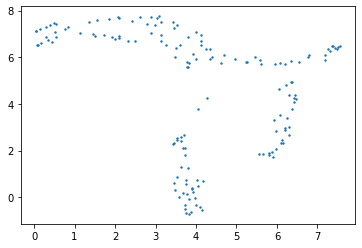

In [ ]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(scaled_deer_data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=2, cmap='Spectral');
plt.savefig('кластеризация', dpi=1080)

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [41]:
#убрать все образцы с пропущенными ячейками, посчитать, сколько таких
deer=pd.read_csv('Разметка оленей (копия).csv')
non_defined_deer=[]
deer = deer.dropna()
deer

,filename,Ax,Ay,Bx,By,Cx,Cy,Dx,Dy,Ex,Ey,Fx,Fy,Hx,Hy,Ix,Iy,Lx,Ly,Kx,Ky,Nx,Ny,xx,xy,yx,yy,Wx,Wy
51,52,746.0,649.0,846.0,277.0,1021.0,473.0,635.0,679.0,592.0,456.0,729.0,347.0,801.0,564.0,557.0,979.0,1086.0,704.0,96.0,545.0,507.0,506.0,636.0,797.0,1030.0,594.0,983.0,58.0
54,55,1874.0,677.0,156.0,464.0,159.0,1049.0,1234.0,862.0,1387.0,522.0,726.0,467.0,712.0,962.0,1341.0,1360.0,172.0,1458.0,2208.0,138.0,1678.0,537.0,1277.0,1084.0,199.0,1236.0,57.0,447.0
60,61,1129.0,460.0,339.0,366.0,289.0,775.0,657.0,792.0,808.0,458.0,609.0,401.0,518.0,729.0,690.0,963.0,291.0,1002.0,846.0,108.0,882.0,440.0,640.0,837.0,266.0,851.0,305.0,327.0
61,62,214.0,643.0,215.0,123.0,354.0,124.0,322.0,451.0,213.0,451.0,215.0,300.0,370.0,301.0,491.0,513.0,595.0,174.0,56.0,656.0,185.0,550.0,402.0,467.0,467.0,142.0,183.0,85.0
62,63,1595.0,571.0,418.0,960.0,516.0,1159.0,1118.0,931.0,1154.0,680.0,755.0,784.0,856.0,1064.0,1344.0,1310.0,509.0,1486.0,1409.0,156.0,1323.0,631.0,1168.0,1147.0,495.0,1266.0,20.0,976.0
63,64,238.0,694.0,1319.0,460.0,1230.0,832.0,598.0,700.0,647.0,488.0,949.0,435.0,939.0,810.0,501.0,964.0,1229.0,1211.0,53.0,247.0,596.0,450.0,554.0,831.0,1229.0,1015.0,1374.0,380.0
64,65,1411.0,655.0,208.0,1092.0,233.0,1482.0,1011.0,1068.0,927.0,835.0,642.0,981.0,674.0,1398.0,1300.0,1531.0,462.0,1980.0,1094.0,113.0,1088.0,799.0,1124.0,1315.0,238.0,1657.0,98.0,993.0
65,66,1673.0,193.0,166.0,486.0,273.0,879.0,829.0,737.0,1021.0,433.0,508.0,456.0,635.0,894.0,939.0,1261.0,397.0,1112.0,1040.0,16.0,1181.0,379.0,874.0,974.0,303.0,998.0,56.0,411.0
66,67,47.0,593.0,1595.0,617.0,1666.0,1125.0,795.0,952.0,695.0,518.0,1139.0,581.0,1180.0,1109.0,684.0,1443.0,1621.0,1563.0,150.0,64.0,342.0,516.0,746.0,1168.0,1699.0,1282.0,1690.0,557.0
70,71,755.0,630.0,112.0,487.0,491.0,702.0,142.0,788.0,502.0,518.0,323.0,499.0,338.0,741.0,587.0,904.0,241.0,944.0,758.0,41.0,570.0,535.0,515.0,797.0,164.0,852.0,35.0,475.0


In [42]:
deer_data = deer[['Ax', 'Ay', 'Bx',
           'By', 'Cx', 'Cy', 'Dx',
           'Dy', 'Ex', 'Ey', 'Fx', 
           'Fy', 'Hx', 'Hy', 'Ix',
           'Iy', 'Lx', 'Ly', 'Kx',
           'Ky', 'Nx', 'Ny', 'xx', 
         'xy', 'yx', 'yy', 'Wx', 'Wy']
].values
scaled_deer_data = StandardScaler().fit_transform(deer_data)
embedding=reducer.fit_transform(scaled_deer_data)

<ipython-input-43-bb1d826ff934>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=2, cmap='Spectral');


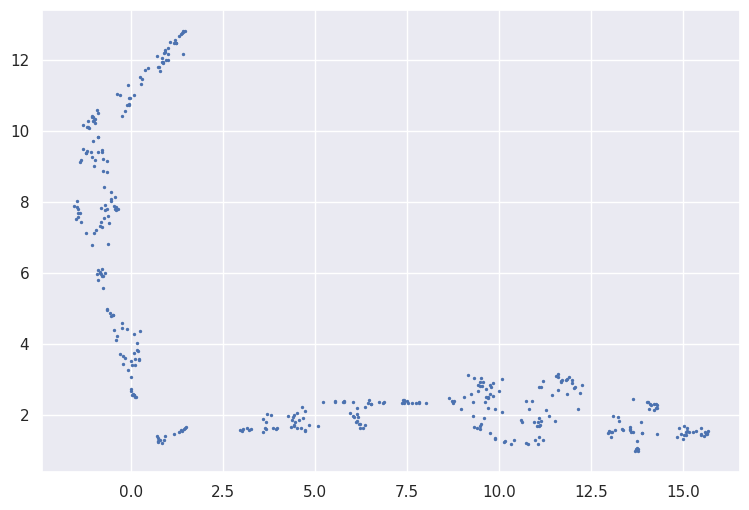

In [43]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(scaled_deer_data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=2, cmap='Spectral');
plt.savefig('кластеризация', dpi=1080)

In [44]:
#инфы получились, потому что в некоторых случаях длина второго отрезка равнялась 0
normal=pd.DataFrame()
normal['FH']=(np.sqrt((deer['Ax']-deer['Bx'])**2+(deer['Ay']-deer['By'])**2))/(np.sqrt((deer['Fx']-deer['Hx'])**2+(deer['Fy']-deer['Hy'])**2))
normal['LI']=(np.sqrt((deer['Ax']-deer['Bx'])**2+(deer['Ay']-deer['By'])**2))/(np.sqrt((deer['Lx']-deer['Ix'])**2+(deer['Ly']-deer['Iy'])**2))
normal['ED']=(np.sqrt((deer['Ax']-deer['Bx'])**2+(deer['Ay']-deer['By'])**2))/(np.sqrt((deer['Ex']-deer['Dx'])**2+(deer['Ey']-deer['Dy'])**2))
normal['BC']=(np.sqrt((deer['Ax']-deer['Bx'])**2+(deer['Ay']-deer['By'])**2))/(np.sqrt((deer['Bx']-deer['Cx'])**2+(deer['By']-deer['Cy'])**2))
normal['KN']=(np.sqrt((deer['Ax']-deer['Bx'])**2+(deer['Ay']-deer['By'])**2))/(np.sqrt((deer['Kx']-deer['Nx'])**2+(deer['Ky']-deer['Ny'])**2))
normal['CL']=(np.sqrt((deer['Ax']-deer['Bx'])**2+(deer['Ay']-deer['By'])**2))/(np.sqrt((deer['Cx']-deer['Lx'])**2+(deer['Cy']-deer['Ly'])**2))
normal['NA']=(np.sqrt((deer['Ax']-deer['Bx'])**2+(deer['Ay']-deer['By'])**2))/(np.sqrt((deer['Nx']-deer['Ax'])**2+(deer['Ny']-deer['Ay'])**2))
normal.reset_index(inplace= True )
normal

,index,FH,LI,ED,BC,KN,CL,NA
0,51,1.684825,0.646092,1.696138,1.466020,0.933051,1.605222,1.383078
1,54,3.495882,1.475708,4.643165,2.959198,2.609513,4.230513,7.187233
2,60,2.337242,1.984459,2.170450,1.930791,2.382339,3.504590,3.210435
3,61,3.354775,1.466468,4.770651,3.740917,3.114448,2.112691,5.337907
4,62,4.164551,1.452653,4.888686,5.588341,2.567970,3.790009,4.450424
5,63,2.948383,1.438727,5.083144,2.891611,1.907930,2.918292,2.552921
6,64,3.060339,1.346274,5.167625,3.275107,1.865691,2.335060,3.619201
7,65,3.366409,2.731184,4.269772,3.769206,3.942296,5.816518,2.918752
8,66,2.923370,1.638894,3.476166,3.018274,3.152560,3.516163,5.077958
9,70,2.716726,1.891188,1.463799,1.511716,1.246224,1.893156,3.167384


In [45]:
#чтобы исчезли инфы,нужно найти причину, мб не будет после норм нормализации
#mean_value=np.mean(normal[normal != np.inf])
normal.replace([np.inf, np.inf, np.inf, np.inf, np.inf, np.inf,np.inf], 0, inplace= True )
normal

,index,FH,LI,ED,BC,KN,CL,NA
0,51,1.684825,0.646092,1.696138,1.466020,0.933051,1.605222,1.383078
1,54,3.495882,1.475708,4.643165,2.959198,2.609513,4.230513,7.187233
2,60,2.337242,1.984459,2.170450,1.930791,2.382339,3.504590,3.210435
3,61,3.354775,1.466468,4.770651,3.740917,3.114448,2.112691,5.337907
4,62,4.164551,1.452653,4.888686,5.588341,2.567970,3.790009,4.450424
5,63,2.948383,1.438727,5.083144,2.891611,1.907930,2.918292,2.552921
6,64,3.060339,1.346274,5.167625,3.275107,1.865691,2.335060,3.619201
7,65,3.366409,2.731184,4.269772,3.769206,3.942296,5.816518,2.918752
8,66,2.923370,1.638894,3.476166,3.018274,3.152560,3.516163,5.077958
9,70,2.716726,1.891188,1.463799,1.511716,1.246224,1.893156,3.167384


In [46]:
idx=deer[deer['filename'] == 197].index
print(idx.to_list())

[196]


In [47]:
normal.iloc[[74]]

,index,FH,LI,ED,BC,KN,CL,NA
74,196,2.908648,1.248694,0.0,2.971542,2.558706,1.6279,3.191526


In [48]:
normal_data = normal[['FH', 'LI', 'ED',
           'BC', 'KN', 'CL', 'NA']].values
scaled_normal_data = StandardScaler().fit_transform(normal_data)
embedding=reducer.fit_transform(scaled_normal_data)

<ipython-input-49-5ae09d3a6e5e>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=2, cmap='Spectral');


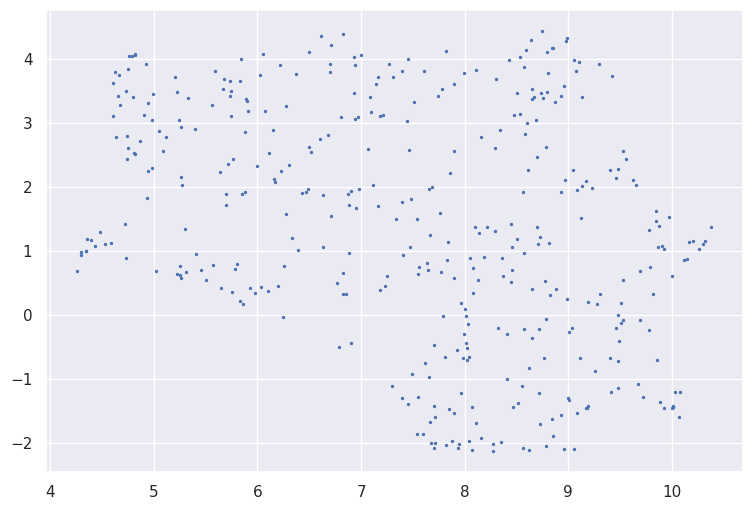

In [49]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(scaled_normal_data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=2, cmap='Spectral');
plt.savefig('нормализованная кластеризация', dpi=1080)

In [50]:
import sklearn.cluster as cluster
import seaborn as sns

inertia = [] # сюда будем сохранять значения
for i in range(8,15): # значения интервала - число кластеров (можно изменять) 
    kmeans = cluster.KMeans( n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17) # сколько раз датасет перемешан перед кластеризацией
    
    
    kmeans.fit(embedding) # обучаем модель
    inertia.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    
print(inertia)

[243.88381958007812, 203.3348388671875, 181.33021545410156, 162.3247528076172, 146.63870239257812, 130.29965209960938, 116.79936218261719]


In [51]:
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(scaled_normal_data)
    
    silhouette[i] = silhouette_score(embedding, kmeans.labels_, metric='euclidean')

print(silhouette)

{2: 0.36560547, 3: 0.3104427, 4: 0.29983816, 5: 0.17770058, 6: 0.24159443, 7: 0.22782184, 8: 0.22841501, 9: 0.17008789}


Оптимальное значение кластеров 7-9???


In [52]:
kmeans = cluster.KMeans(n_clusters=8,random_state=17,init='k-means++')

kmeans_labels = kmeans.fit_predict(embedding)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids = kmeans.cluster_centers_

display(pd.Series(kmeans_labels).value_counts()) # кол-во оленей по кластерам
kmeans_labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6    58
7    56
2    53
4    52
3    52
1    45
0    43
5    41
dtype: int64

array([4, 5, 2, 7, 6, 7, 7, 0, 0, 2, 7, 6, 1, 2, 2, 4, 5, 0, 2, 7, 3, 5,
       4, 7, 2, 0, 3, 2, 0, 0, 0, 6, 7, 3, 3, 4, 3, 5, 6, 3, 0, 7, 4, 0,
       1, 4, 4, 0, 0, 0, 6, 0, 0, 6, 2, 2, 7, 6, 0, 3, 6, 6, 6, 6, 2, 3,
       2, 4, 4, 3, 2, 4, 3, 1, 2, 3, 5, 4, 6, 4, 3, 5, 5, 4, 1, 5, 3, 0,
       7, 7, 6, 6, 1, 1, 2, 7, 0, 0, 2, 6, 7, 7, 2, 3, 5, 0, 6, 2, 3, 3,
       2, 2, 7, 2, 3, 7, 4, 2, 5, 1, 3, 7, 5, 1, 1, 4, 2, 2, 2, 6, 7, 3,
       4, 1, 4, 7, 7, 0, 3, 7, 1, 3, 4, 0, 4, 0, 3, 7, 7, 4, 4, 4, 4, 2,
       4, 6, 6, 7, 5, 1, 3, 1, 7, 1, 7, 7, 4, 4, 6, 6, 6, 4, 1, 4, 3, 4,
       3, 4, 0, 5, 4, 6, 6, 6, 2, 2, 4, 2, 7, 5, 0, 7, 7, 1, 5, 3, 7, 4,
       6, 0, 6, 2, 7, 3, 5, 7, 7, 6, 1, 2, 3, 2, 4, 0, 0, 7, 0, 1, 1, 7,
       7, 3, 3, 3, 4, 1, 1, 7, 5, 7, 2, 7, 3, 4, 7, 6, 5, 5, 1, 2, 0, 4,
       5, 5, 7, 7, 4, 1, 1, 4, 2, 4, 0, 3, 4, 5, 1, 5, 3, 3, 7, 2, 4, 4,
       4, 2, 5, 7, 6, 2, 5, 5, 2, 2, 1, 5, 5, 7, 4, 0, 5, 2, 3, 5, 7, 2,
       1, 2, 2, 4, 7, 4, 6, 6, 3, 5, 2, 1, 6, 6, 6,

In [53]:
normal['Номер кластера']=kmeans_labels
normal

,index,FH,LI,ED,BC,KN,CL,NA,Номер кластера
0,51,1.684825,0.646092,1.696138,1.466020,0.933051,1.605222,1.383078,4
1,54,3.495882,1.475708,4.643165,2.959198,2.609513,4.230513,7.187233,5
2,60,2.337242,1.984459,2.170450,1.930791,2.382339,3.504590,3.210435,2
3,61,3.354775,1.466468,4.770651,3.740917,3.114448,2.112691,5.337907,7
4,62,4.164551,1.452653,4.888686,5.588341,2.567970,3.790009,4.450424,6
5,63,2.948383,1.438727,5.083144,2.891611,1.907930,2.918292,2.552921,7
6,64,3.060339,1.346274,5.167625,3.275107,1.865691,2.335060,3.619201,7
7,65,3.366409,2.731184,4.269772,3.769206,3.942296,5.816518,2.918752,0
8,66,2.923370,1.638894,3.476166,3.018274,3.152560,3.516163,5.077958,0
9,70,2.716726,1.891188,1.463799,1.511716,1.246224,1.893156,3.167384,2


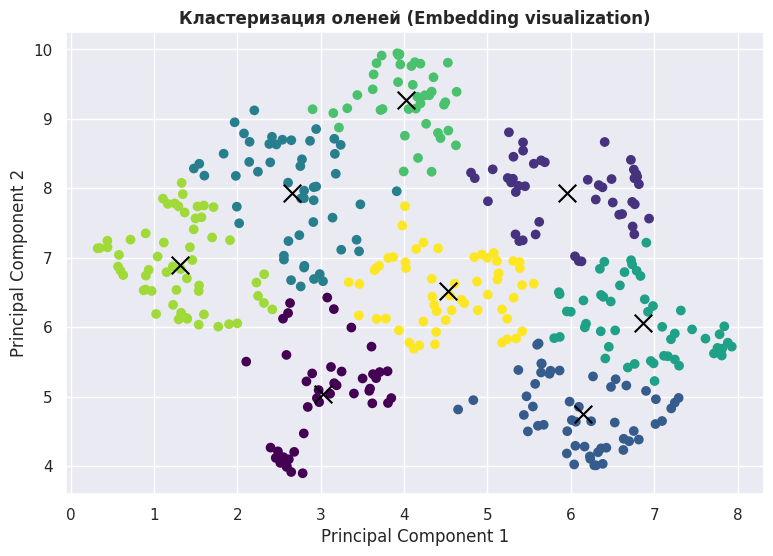

In [54]:
#здесь фигня какя_то
sns.set( rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=embedding[:, 0], y=embedding[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Кластеризация оленей (Embedding visualization)',fontweight='bold')
plt.savefig('Кластеризация оленей', dpi=1080)
plt.show()